In [1]:
import pandas as pd
import numpy as np

# plotting
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import autocorrelation_plot
sns.set_style("dark")

# Data preprocessing
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from pandas_datareader.data import DataReader
import datetime as dt

# Time series
from statsmodels.tsa.seasonal import seasonal_decompose

#metrics
from sklearn.metrics import mean_squared_error

# custom functions
import functions

In [2]:
# Important dates
start = dt.datetime(2017,8,6)
end = dt.datetime(2022,8,6)

In [3]:
# import netflix stock
nflx = DataReader("NFLX",  "yahoo", start, end)
nflx["Adj Close"]

Date
2017-08-07    181.330002
2017-08-08    178.360001
2017-08-09    175.779999
2017-08-10    169.139999
2017-08-11    171.399994
                 ...    
2022-08-01    226.210007
2022-08-02    221.419998
2022-08-03    226.729996
2022-08-04    229.910004
2022-08-05    226.779999
Name: Adj Close, Length: 1259, dtype: float64

In [4]:
# import nasdaq stock
nasdaq = DataReader("^NYA",  "yahoo", start, end)
nasdaq.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-08-07,11987.790039,11969.940430,11983.719727,11987.769531,2931780000,11987.769531
2017-08-08,12019.849609,11931.709961,11987.769531,11949.969727,3344640000,11949.969727
2017-08-09,11930.129883,11896.360352,11906.629883,11929.459961,3308060000,11929.459961
2017-08-10,11889.280273,11770.480469,11889.280273,11771.599609,3621070000,11771.599609
2017-08-11,11791.379883,11753.299805,11754.400391,11763.219727,3159930000,11763.219727


In [5]:
# import S&P 500
gspc = DataReader("^GSPC", "yahoo", start, end)
gspc.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-08-07,2480.949951,2475.879883,2477.139893,2480.909912,2931780000,2480.909912
2017-08-08,2490.870117,2470.320068,2478.350098,2474.919922,3344640000,2474.919922
2017-08-09,2474.409912,2462.080078,2465.350098,2474.020020,3308060000,2474.020020
2017-08-10,2465.379883,2437.750000,2465.379883,2438.209961,3621070000,2438.209961
2017-08-11,2448.090088,2437.850098,2441.040039,2441.320068,3159930000,2441.320068


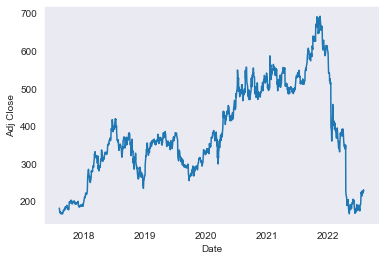

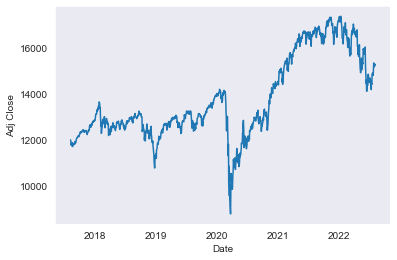

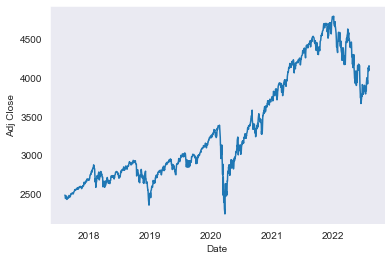

In [6]:
sns.lineplot(data=nflx['Adj Close'])
plt.show()
sns.lineplot(data=nasdaq['Adj Close'])
plt.show()
sns.lineplot(data=gspc['Adj Close'])
plt.show()

In [7]:
# GSPC has the most correlation with NFLX, so it is the chosen market index
pd.concat([nflx['Adj Close'], nasdaq['Adj Close'], gspc['Adj Close']], axis=1).corr()

,Adj Close,Adj Close,Adj Close
Adj Close,1.000000,0.525485,0.630309
Adj Close,0.525485,1.000000,0.950301
Adj Close,0.630309,0.950301,1.000000


In [8]:
# concatenate stock and market data
features = concatRename(nflx, 'nflx_', gspc, 'gspc_')

NameError: name 'concatRename' is not defined